In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv("/content/FoDS-A1.csv")
def normalize(X):
  sigma=X.std()
  mean=X.mean()
  return (X-mean)/sigma
train = data.sample(frac=0.7)
test = data.drop(train.index)
sigma1=train["Strength"].std()
sigma2=train["Temperature"].std()
sigma3=train["Pressure"].std()
mean1=train["Strength"].mean()
mean2=train["Temperature"].mean()
mean3=train["Pressure"].mean()

train["Strength"]=(train["Strength"]-mean1)/sigma1
train["Temperature"]=(train["Temperature"]-mean2)/sigma2
train["Pressure"]=(train["Pressure"]-mean3)/sigma3

test["Strength"]=(test["Strength"]-mean1)/sigma1
test["Temperature"]=(test["Temperature"]-mean2)/sigma2
test["Pressure"]=(test["Pressure"]-mean3)/sigma3

In [ ]:
df_train=pd.DataFrame()
x1=train["Strength"].to_numpy()
x2=train["Temperature"].to_numpy()
ones=np.ones((train.shape[0],1))
df_train=pd.concat([df_train,pd.DataFrame(ones)],ignore_index=True,axis=1)
df_train=pd.concat([df_train,pd.DataFrame(x1)],ignore_index=True,axis=1)
df_train=pd.concat([df_train,pd.DataFrame(x2)],ignore_index=True,axis=1)
df_train

0         1         2
0     1.0 -0.424459 -0.924128
1     1.0 -0.752842 -0.924128
2     1.0 -0.424459  0.649233
3     1.0  0.122848 -0.609456
4     1.0 -0.807573 -1.238800
...   ...       ...       ...
1150  1.0  0.122848  0.334560
1151  1.0  1.915276  1.593249
1152  1.0 -0.657064 -0.609456
1153  1.0 -1.382245 -1.553472
1154  1.0 -1.012813  0.019888

[1155 rows x 3 columns]

In [ ]:
for i in range(2,10):
  for j in range (i+1):
    r=i-j
    arr=np.multiply(np.power(x1,r),np.power(x2,j))
    df_train=pd.concat([df_train,pd.DataFrame(arr)],ignore_index=True,axis=1)


In [ ]:
df_test=pd.DataFrame()
x1_test=test["Strength"].to_numpy()
x2_test=test["Temperature"].to_numpy()
ones=np.ones((test.shape[0],1))
df_test=pd.concat([df_test,pd.DataFrame(ones)],ignore_index=True,axis=1)
df_test=pd.concat([df_test,pd.DataFrame(x1_test)],ignore_index=True,axis=1)
df_test=pd.concat([df_test,pd.DataFrame(x2_test)],ignore_index=True,axis=1)
df_test

0         1         2
0    1.0  0.122848 -0.294784
1    1.0 -0.698112  0.019888
2    1.0  0.122848  0.019888
3    1.0 -1.272783 -1.238800
4    1.0  0.382818  0.649233
..   ...       ...       ...
490  1.0  1.203778  0.963905
491  1.0  0.369136  0.649233
492  1.0  1.203778  1.278577
493  1.0 -2.080060 -1.553472
494  1.0 -1.368562 -1.238800

[495 rows x 3 columns]

In [ ]:
for i in range(2,10):
  for j in range (i+1):
    r=i-j
    arr=np.multiply(np.power(x1_test,r),np.power(x2_test,j))
    df_test=pd.concat([df_test,pd.DataFrame(arr)],ignore_index=True,axis=1)

In [ ]:
y_actual_train=train["Pressure"].to_numpy()
y_actual_test=test["Pressure"].to_numpy()
y_actual_train

array([ 0.28655939, -0.296145  ,  1.45196816, ...,  0.86926377,
       -0.296145  ,  1.45196816])

In [ ]:
def GD(X,W,eta,Y,iterations,deg,graph):
  training_error = np.zeros((iterations,1))

  k = 0

  for i in range(iterations):
    np.reshape(Y,(1155,1))
    E=np.dot(X,W).T-Y
    training_error[i]=(np.sum(np.multiply(E,E)))/len(X)
    for j in range(W.shape[0]):
      W[j]=W[j]-2*eta*np.sum(np.multiply(E,X[:,j]))/len(X)
    if(i%50==0):
      graph_GD[deg][k]=training_error[i]
      k+=1
  return training_error,W,graph

0
1
2
3
4
5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in multiply
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in subtract
  # This is added back by InteractiveShellApp.init_path()


6
7
8
9


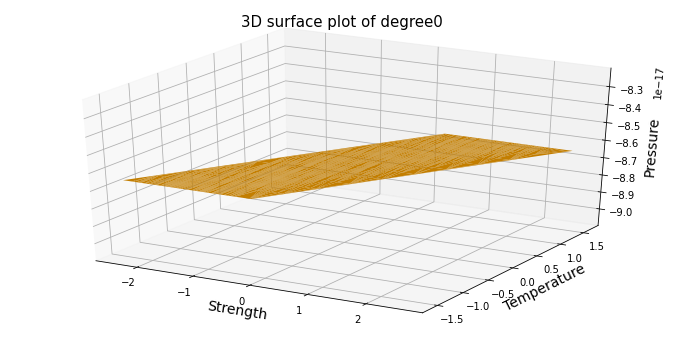

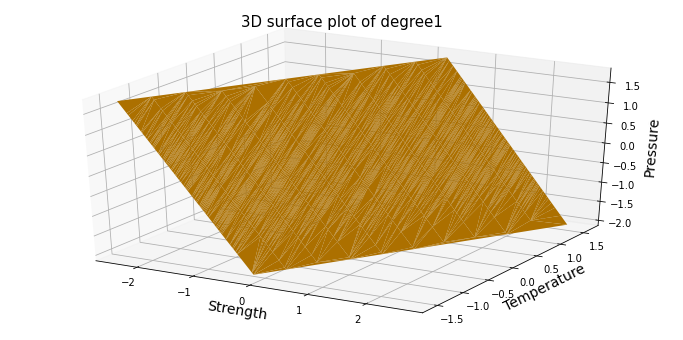

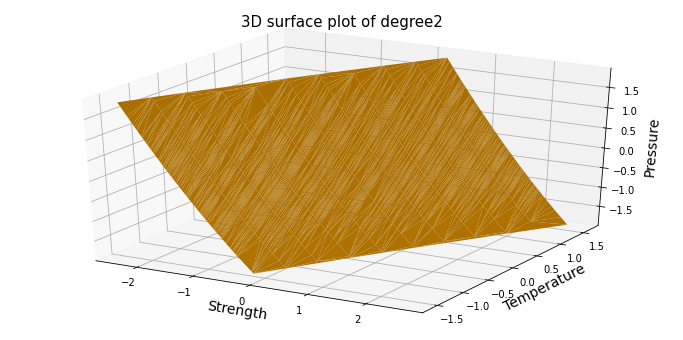

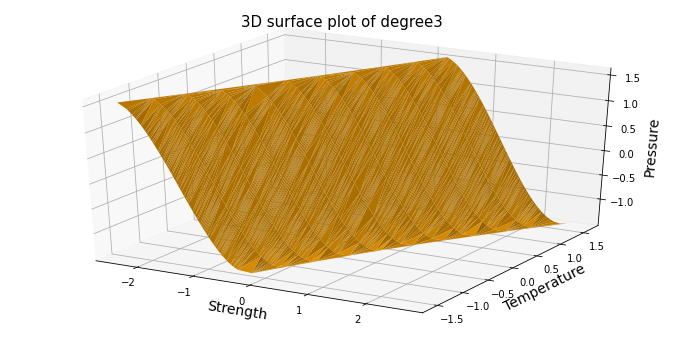

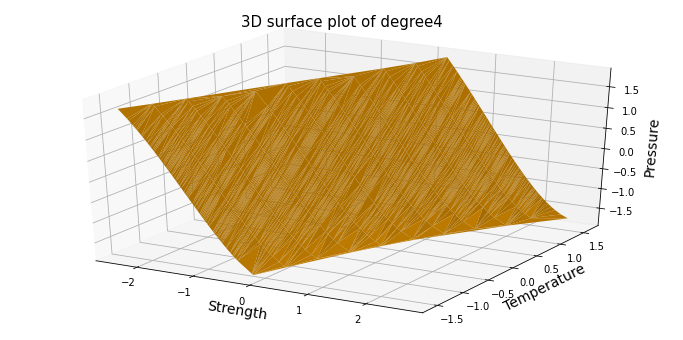

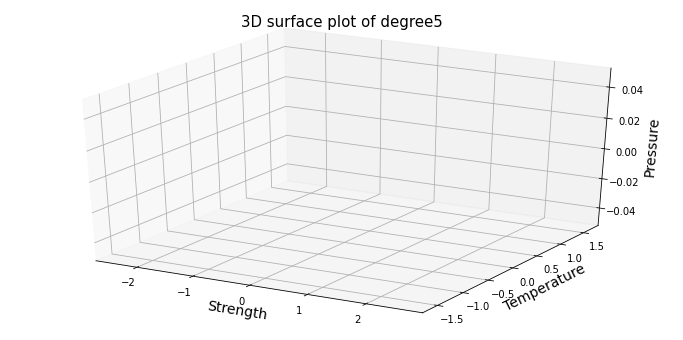

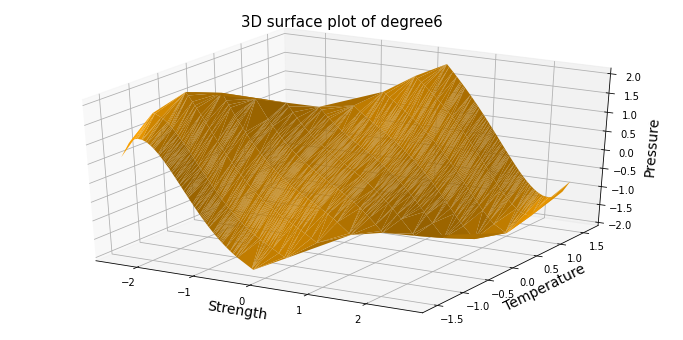

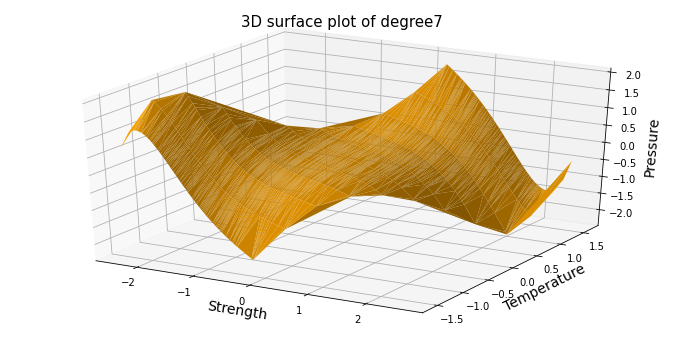

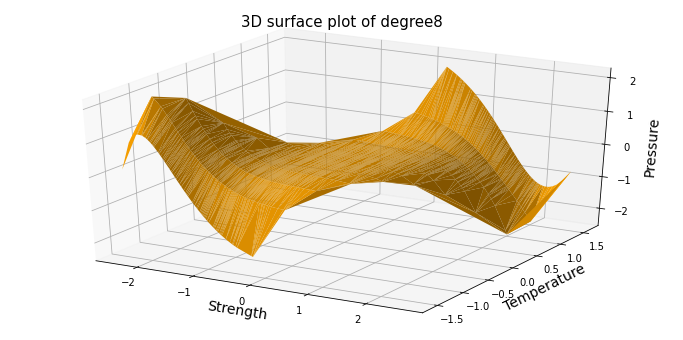

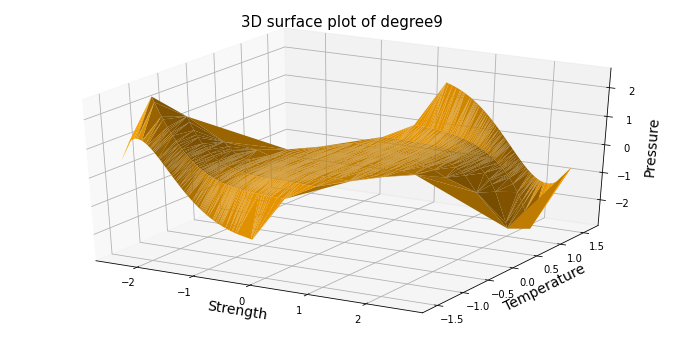

In [ ]:
E_train=[0]*10
final_W=[]
E_test=[0]*10
X_dummy=df_train.iloc[:,:1].to_numpy()
iterations=10000
graph_GD=np.zeros((10,(int)(iterations/50)))
eta=[0.5,0.5,0.1,0.04,0.01,0.035,0.0008,0.00015,0.00003,0.000004]
for i in range(10):
  print(i)
  e=eta[i]
  n=int((i+1)*(i+2)/2)
  W=np.random.randn(n,1)*0.01
  X=df_train.iloc[:,:n].to_numpy()
  error,W_optimized,graph_GD=GD(X,W,e,Y=y_actual_train,iterations=iterations,deg=i,graph=graph_GD)
  final_W.append(W_optimized)
  Er_train=np.dot(df_train.iloc[:,:n],W_optimized).T-y_actual_train
  E_train[i]=(np.mean(np.multiply(Er_train,Er_train)))
  Er_test=np.dot(df_test.iloc[:,:n],W_optimized).T-y_actual_test
  E_test[i]=(np.mean(np.multiply(Er_test,Er_test)))
  Y_pred=np.dot(X,W_optimized)
  y=[]
  for j in Y_pred:
    for r in j:
      y.append(r)
  stro=".png"
  t="3D surface plot of degree"+str(i)
  fig=plt.figure(figsize=(12,6))
  ax1=fig.gca(projection="3d")
  ax1.set_title(t,fontsize=15)
  ax1.set_xlabel('Strength',fontsize=14)
  ax1.set_ylabel('Temperature',fontsize=14)
  ax1.set_zlabel('Pressure',fontsize=14)
  ax1.plot_trisurf(x1,x2,y,color='orange')
  fig.savefig(str(i)+stro)
  plt.show


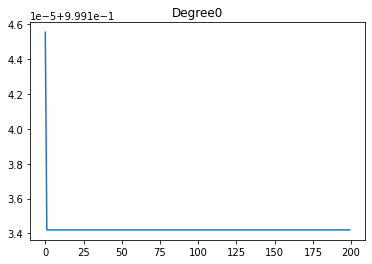

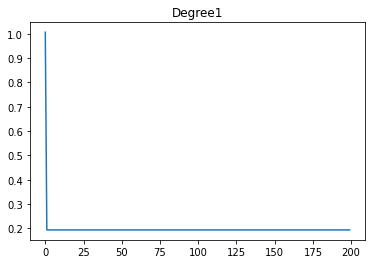

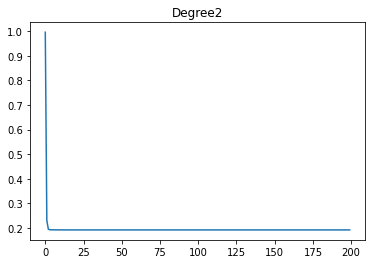

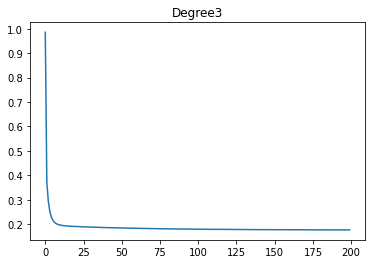

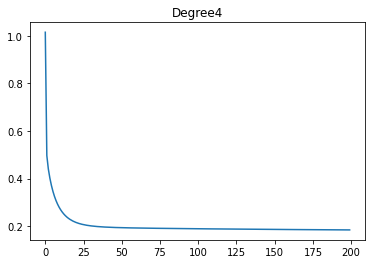

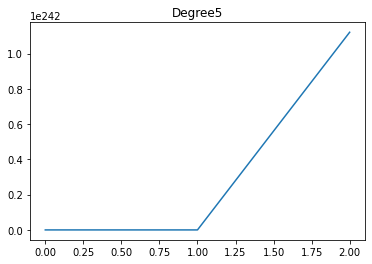

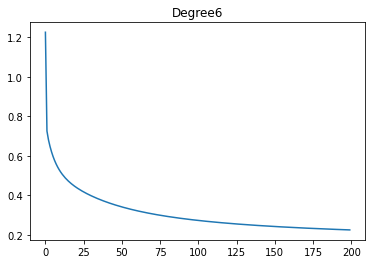

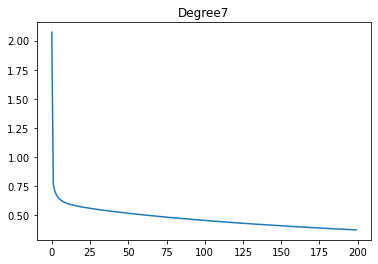

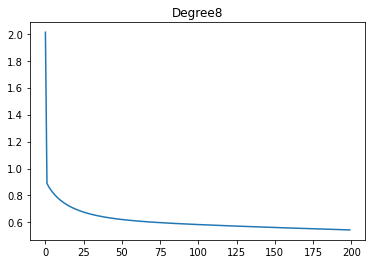

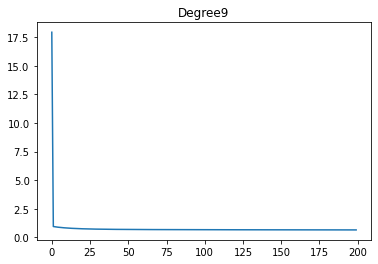

In [ ]:
a = np.arange(0,(int)(iterations/50))
for i in range(10):
  plt.plot(a,graph_GD[i,:])
  tit='Degree'+str(i)

  plt.title(tit)
  plt.show()

In [ ]:
print(E_train)
print(E_test)

[0.9991341991342046, 0.19354697904796098, 0.19167401058045444, 0.17691025903371202, 0.18461939488916343, nan, 0.22429715056410238, 0.372967310151787, 0.5440582489092189, 0.6509069552653148]
[0.9698895555028866, 0.20904458962997022, 0.20740086154281273, 0.1943099669577682, 0.20013337115353158, nan, 0.24796470767396564, 0.38721397196650587, 0.5473637774380911, 0.6556258481403462]


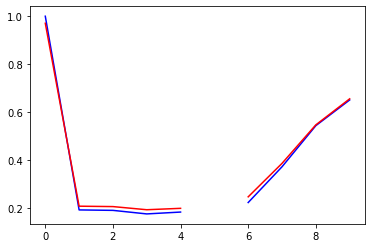

In [ ]:
a=[0,1,2,3,4,5,6,7,8,9]
plt.plot(a,E_train,'b')
plt.plot(a,E_test,'r')
plt.show()

In [ ]:
def SGD(X,W,eta,Y,iterations,deg,min,W_opt):
  training_error=np.zeros((iterations,1))
  count=0
  k=0
  W_opt=W
  for i in range(iterations):
    for index in range(X.shape[0]):
      ind_X=X[index,:]
      ind_Y=Y[index]
      E=np.dot(ind_X,W).T-ind_Y
      training_error[i]=np.multiply(E,E)
      for j in range(W.shape[0]):
        W[j]=W[j]-eta*np.multiply(E,X[index,j])
      if count%50==0:
        if k<graph.shape[1]:
          graph[deg][k]=training_error[i]
          k+=1
      count+=1
      Er_train=np.dot(df_train.iloc[:,:n],W).T-y_actual_train
      Overall_train=(np.mean(np.multiply(Er_train,Er_train)))
      if Overall_train<min:
        min=Overall_train
        W_opt=W
  return training_error,W_opt

0
[[0.38917357]]
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
1
[[ 0.0334429 ]
 [-1.60001101]
 [ 1.63420924]]
[[ 1.         -0.42445853 -0.92412786]
 [ 1.         -0.75284231 -0.92412786]
 [ 1.         -0.42445853  0.64923251]
 ...
 [ 1.         -0.65706371 -0.60945578]
 [ 1.         -1.38224454 -1.55347201]
 [ 1.         -1.01281279  0.01988836]]
2
[[-0.06185075]
 [-1.61552262]
 [ 1.63697483]
 [ 0.07548331]
 [-0.17608288]
 [ 0.11042851]]
[[ 1.00000000e+00 -4.24458534e-01 -9.24127857e-01  1.80165047e-01
   3.92253956e-01  8.54012297e-01]
 [ 1.00000000e+00 -7.52842306e-01 -9.24127857e-01  5.66771538e-01
   6.95722548e-01  8.54012297e-01]
 [ 1.00000000e+00 -4.24458534e-01  6.49232513e-01  1.80165047e-01
  -2.75572281e-01  4.21502856e-01]
 ...
 [ 1.00000000e+00 -6.57063706e-01 -6.09455783e-01  4.31732714e-01
   4.00451276e-01  3.71436352e-01]
 [ 1.00000000e+00 -1.38224454e+00 -1.55347201e+00  1.91059996e+00
   2.14727819e+00  2.41327527e+00]
 [ 1.00000000e+00 -1.01281279e+00  1.98883649e-02 

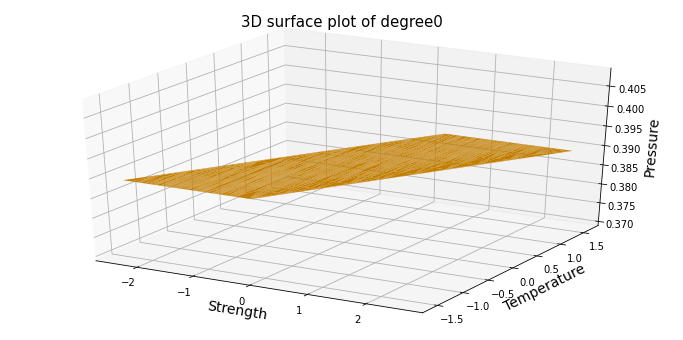

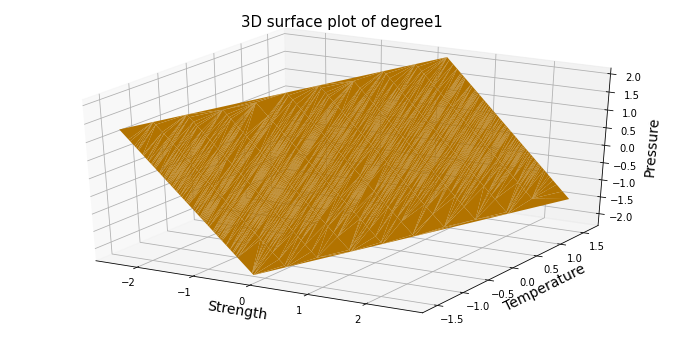

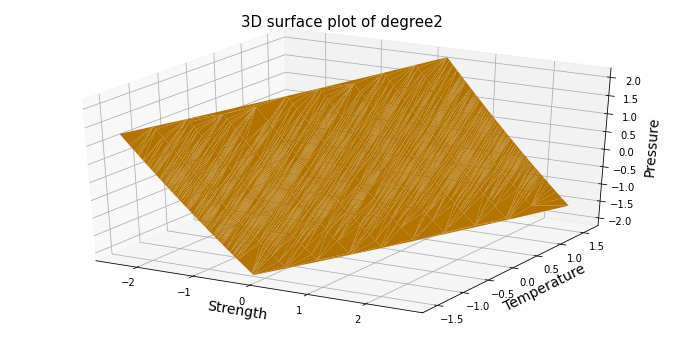

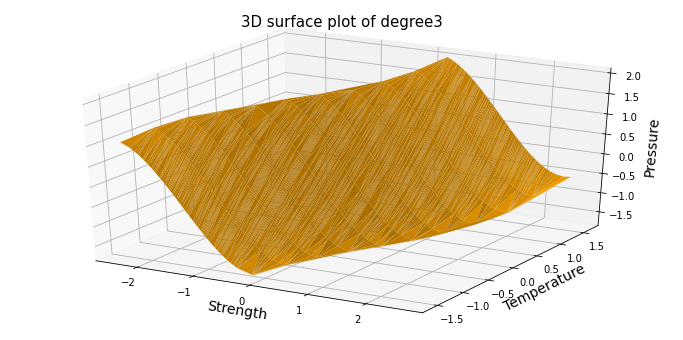

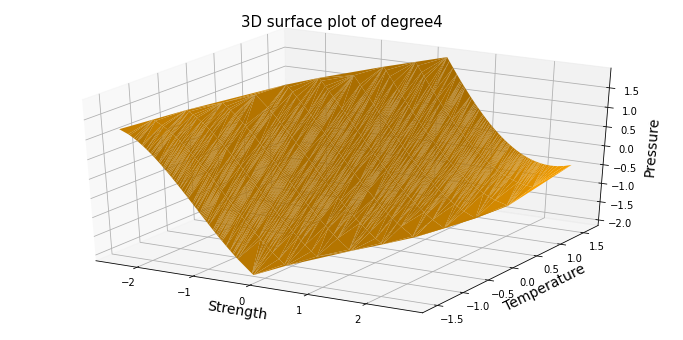

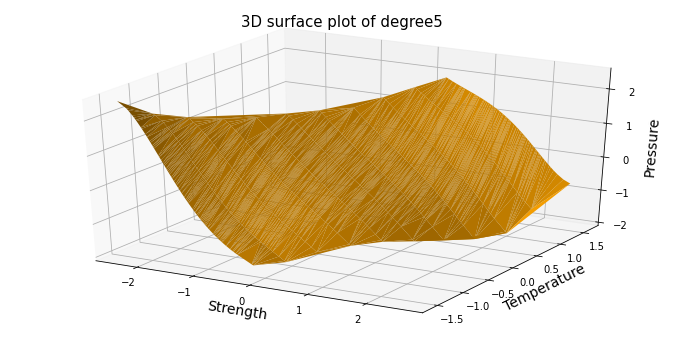

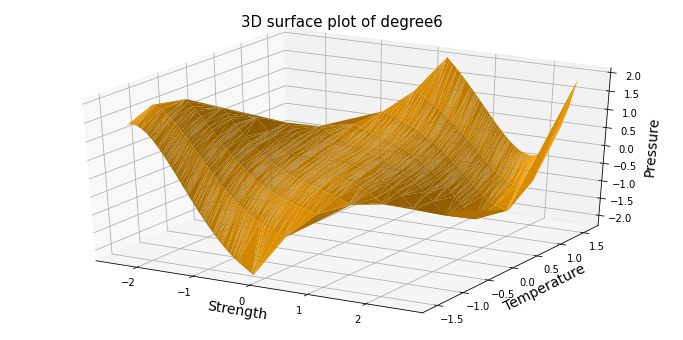

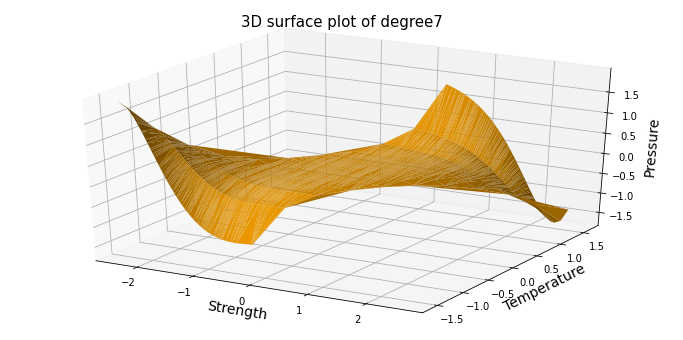

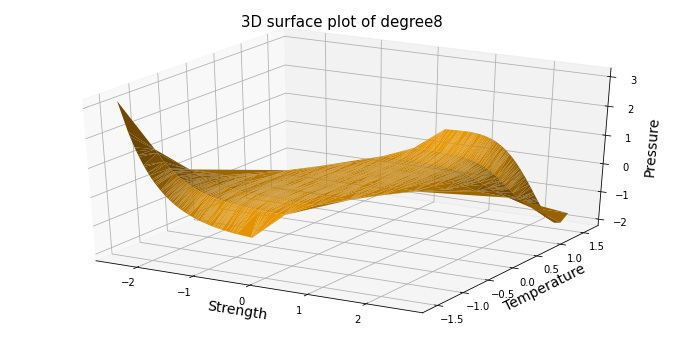

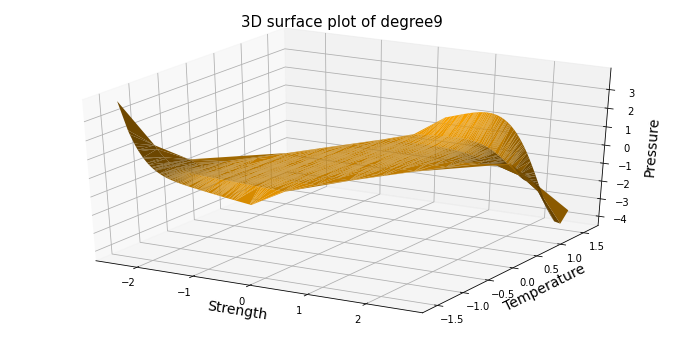

In [ ]:
E_train=[0]*10
final_W=[]
E_test=[0]*10
X_dummy=df_train.iloc[:,:1].to_numpy()
iterations=50
graph=np.zeros((10,(int)((X_dummy.shape[0]*iterations)/50)))

eta=[0.1,0.1,0.05,0.009,0.002,0.0005,0.00007,0.000001,0.0000005,0.00000005]
for i in range(10):
  print(i)
  min=3
  e=eta[i]
  n=(int)((i+1)*(i+2)/2)
  W=np.random.randn(n,1)*0.01
  W_opt=np.zeros((n,1))
  X=df_train.iloc[:,:n].to_numpy()
  error,W_optimized=SGD(X,W,e,Y=y_actual_train,iterations=iterations,deg=i,W_opt=W_opt,min=min)
  print(W_optimized)
  print(X)
  E_train[i]=error.min()
  final_W.append(W_optimized)
  Er_train=np.dot(df_train.iloc[:,:n],W_optimized).T-y_actual_train
  E_train[i]=(np.mean(np.multiply(Er_train,Er_train)))
  Er_test=np.dot(df_test.iloc[:,:n],W_optimized).T-y_actual_test
  E_test[i]=(np.mean(np.multiply(Er_test,Er_test)))
  Y_pred=np.dot(X,W_optimized)
  y=[]
  for j in Y_pred:
    for r in j:
      y.append(r)
  stro="SGD.png"
  t="3D surface plot of degree"+str(i)
  fig=plt.figure(figsize=(12,6))
  ax1=fig.gca(projection="3d")
  ax1.set_title(t,fontsize=15)
  ax1.set_xlabel('Strength',fontsize=14)
  ax1.set_ylabel('Temperature',fontsize=14)
  ax1.set_zlabel('Pressure',fontsize=14)
  ax1.plot_trisurf(x1,x2,y,color='orange')
  fig.savefig(str(i)+stro)
  plt.show

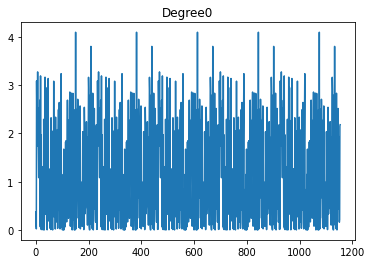

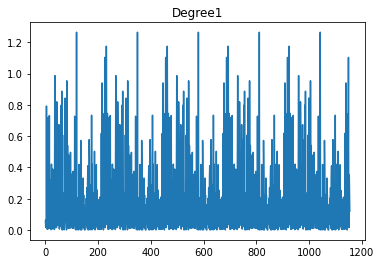

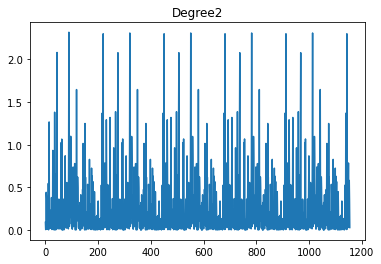

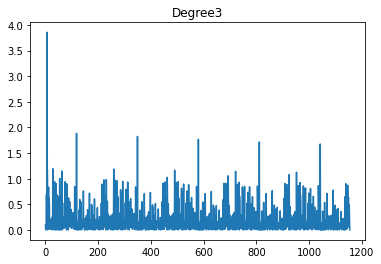

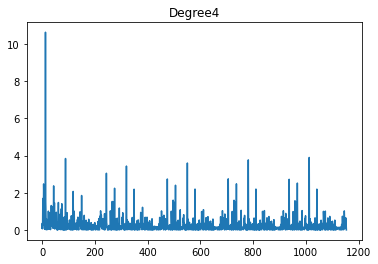

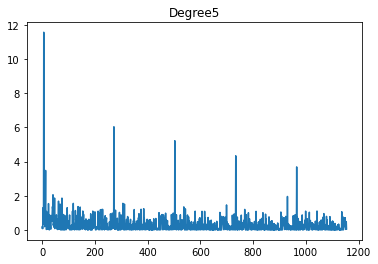

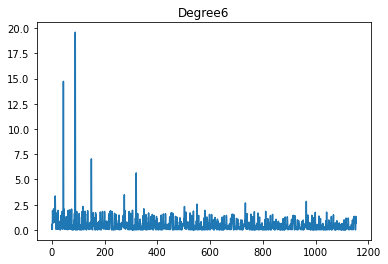

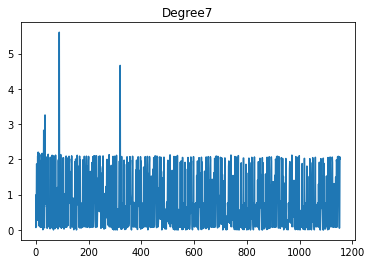

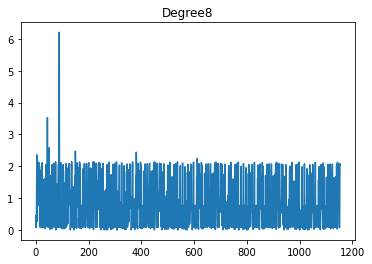

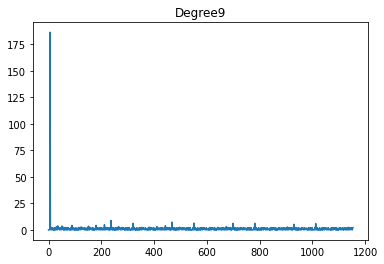

In [ ]:
a = np.arange(0,(int)((X_dummy.shape[0]*iterations)/50))
for i in range(10):
  plt.plot(a,graph[i,:])
  tit='Degree'+str(i)

  plt.title(tit)
  plt.show()

In [ ]:
print(E_train)
print(E_test)


[1.1505902669380812, 0.25724436041605914, 0.2503419658586088, 0.2532316165473712, 0.21002541849755696, 0.3132676923586521, 0.37870166832925156, 0.6707500813745899, 0.7306263067883993, 0.8701901975381581]
[1.1337805144307729, 0.2666573633702521, 0.2626528203204988, 0.2667052019658176, 0.21971793412080107, 0.3325261716821385, 0.3915591234529815, 0.6641314282804017, 0.7208252131755405, 0.882567893349905]


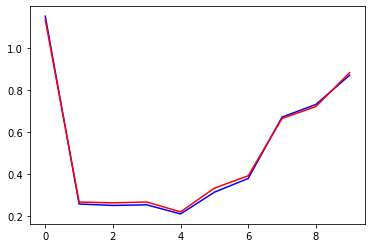

In [ ]:
a=[0,1,2,3,4,5,6,7,8,9]
plt.plot(a,E_train,'b')
plt.plot(a,E_test,'r')
plt.show()

In [78]:
def GD_RL(X,W,eta,Y,iterations,deg,s,lam):
  training_error = np.zeros((iterations,1))
  k = 0
  if s =="Ridge":
    for i in range(iterations):
      np.reshape(Y,(1155,1))
      E=np.dot(X,W).T-Y
      training_error[i]=((np.sum(np.multiply(E,E)))+(lam/2)*np.sum(np.multiply(W,W)))/len(X)
      for j in range(W.shape[0]):
        W[j]=W[j]-eta*(2*np.sum(np.multiply(E,X[:,j]))+lam*W[j])/len(X)
    return training_error,W
  else:
    for i in range(iterations):
      np.reshape(Y,(1155,1))
      E=np.dot(X,W).T-Y
      training_error[i]=((np.sum(np.multiply(E,E)))+(lam/2)*(np.sum(np.abs(W))))/len(X)
      for j in range(W.shape[0]):
        W[j]=W[j]-eta*(2*np.sum(np.multiply(E,X[:,j]))+lam*np.sign(W[j]))/len(X)
    return training_error,W


In [83]:
lam= []
E_train_list=[]
E_test_list=[]
for i in range(5):
    lam.append(0.0000001+i*0.0000003)
for i in lam:
    k=9
    eta=0.000005
    iterations=50000
    n=(int)((k+1)*(k+2)/2)
    W=np.random.randn(n,1)*0.01
    X=df_train.iloc[:,:n].to_numpy()
    Y=y_actual_train
    error,W=GD_RL(X,W,eta,Y=y_actual_train,iterations=iterations,deg=k, s="Ridge", lam=i)
    Er_train=np.dot(df_train.iloc[:,:n],W).T-y_actual_train
    E_train=(np.mean(np.multiply(Er_train,Er_train)))
    Er_test=np.dot(df_test.iloc[:,:n],W).T-y_actual_test
    E_test=(np.mean(np.multiply(Er_test,Er_test)))
    E_train_list.append(E_train)
    E_test_list.append(E_test)

In [93]:
print(E_train_list)
print(E_test_list)

[0.5504683336160868, 0.5528305189766408, 0.5600924255864841, 0.556270004457822, 0.556039480203206]
[0.53359087701208, 0.5359363612469779, 0.5437538439877767, 0.5406347684304531, 0.5407948052423562]


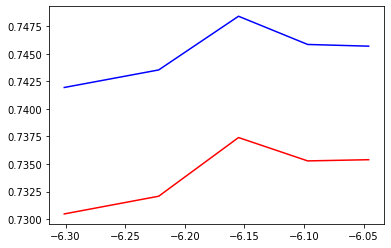

In [92]:
BGD_R_L=pd.DataFrame()
lam_n=np.array(lam)
E_train_n=np.array(E_train_list)
E_test_n=np.array(E_test_list)
E_train_n=np.sqrt(E_train_n)
E_test_n=np.sqrt(E_test_n)
BGD_R_L=pd.concat([BGD_R_L,pd.DataFrame(lam_n)],ignore_index=True,axis=1)
BGD_R_L=pd.concat([BGD_R_L,pd.DataFrame(E_train_n)],ignore_index=True,axis=1)
BGD_R_L=pd.concat([BGD_R_L,pd.DataFrame(E_test_n)],ignore_index=True,axis=1)
a=[0.0000005,0.0000006,0.0000007,0.0000008,0.0000009]
a=np.array(a)
a=np.log10(a)
plt.plot(a,E_train_n,'b')
plt.plot(a,E_test_n,'r')
plt.show()